In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [96]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [107]:
#Reading Data from csv file 
df = pd.read_csv('C:\\Users\\renuk\\OneDrive\\Documents\\BikeSharingAssignment\\day.csv')

In [98]:
#checking the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [99]:
#checking the shape 
df.shape

(730, 16)

In [100]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [101]:
#checking if null values exists or not
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [108]:
# Dropping the column instant as we already have index column
# Dropping the dteday column
# Dropping Registered and casual columns as cnt is target variable and both are redundant 
df = df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

In [109]:
#checking the intial rows of dataframe
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [104]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Encoding Variables Season mnth weekday weathersit

### Season

#### converting season to category of 1:spring, 2:summer, 3:fall, 4:winter

In [111]:
#checking the count of values of unique values of Season
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [112]:
def object_map(x):
    return x.map({
        1:'spring',
        2:'summer',
        3:'fall',
        4:'winter'
    })

df[['season']] = df[['season']].apply(object_map)

In [113]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

### Month

#### Converting the months from 1 to 12 to Jan to dec

In [114]:
def object_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

df[['mnth']] = df[['mnth']].apply(object_map)

In [115]:
df.mnth.value_counts()

Jul    62
Oct    62
Jan    62
Dec    62
Aug    62
May    62
Mar    62
Apr    60
Nov    60
Jun    60
Sep    60
Feb    56
Name: mnth, dtype: int64

### weekday

#### changing weekday from 0 to 6 to sun to sat

In [116]:
# season mnth weekday weather
df.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [117]:
def object_map(x):
    return x.map({
        0:'Sunday',
        1:'Monday',
        2:'Tuesday',
        3:'Wednesday',
        4:'Thursday',
        5:'Friday',
        6:'Saturday'
    })

df[['weekday']] = df[['weekday']].apply(object_map)


In [118]:
df.weekday.value_counts()

Tuesday      105
Monday       105
Friday       104
Wednesday    104
Saturday     104
Sunday       104
Thursday     104
Name: weekday, dtype: int64

### Weathersit to 1 to 4 to A to D

In [119]:
def object_map(x):
    return x.map({
        1:'A',
        2:'B',
        3:'C',
        4:'D'
    })

df[['weathersit']] = df[['weathersit']].apply(object_map)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [121]:
df.weathersit.value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [122]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,B,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,B,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,A,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,A,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,A,9.305237,11.46350,43.6957,12.522300,1600


In [123]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [125]:
# yr has two values 0 and 1 treating them as categorical
df['yr'] = df['yr'].apply(str)

In [126]:
df['holiday'] = df['holiday'].apply(str)


In [127]:
df['workingday'] = df['workingday'].apply(str)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [129]:
#including categorical columns
Bike_categorical = df.select_dtypes(exclude=['float64','datetime64','int64'])
print(Bike_categorical.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')


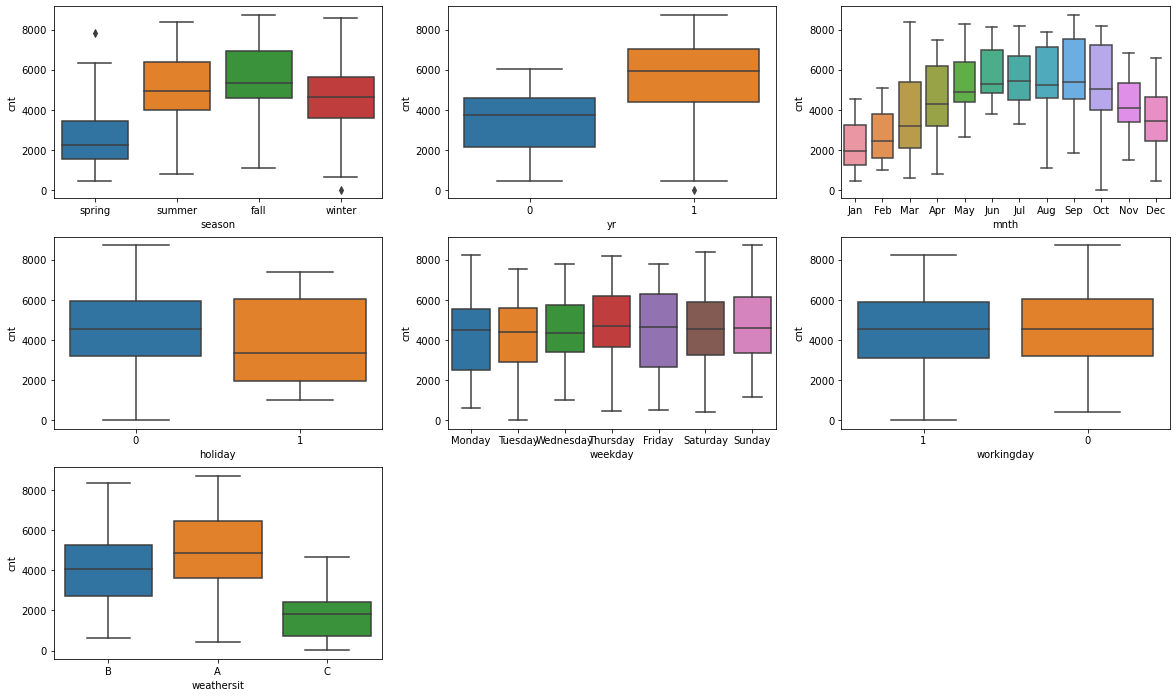

In [130]:
# Plotting a box plot of all the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

 There are 7 categorical variable
 Season : The top most season for riders is fall and followed by summer and winter. Season is definatly good predictor of independent variable
 year: The number of bookings was high in 2019 than 2018
 Month: Most of the bookings are done from May to Oct. This shows month has some trend in bookings
 Holiday: Bookings are mostly done on weekends or Holidays
 Weekday: Bookings are mostly on all of the weekdays
 weathersit: The bookings are quite more on weather A ie cloudy partly cloudy inshort when weather is nice.

In [131]:
df.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


## Pair plot for numerical variables

In [136]:
# Plotting pair plot with numerical variables
InvariableList = ['temp','atemp','hum','windspeed','cnt']


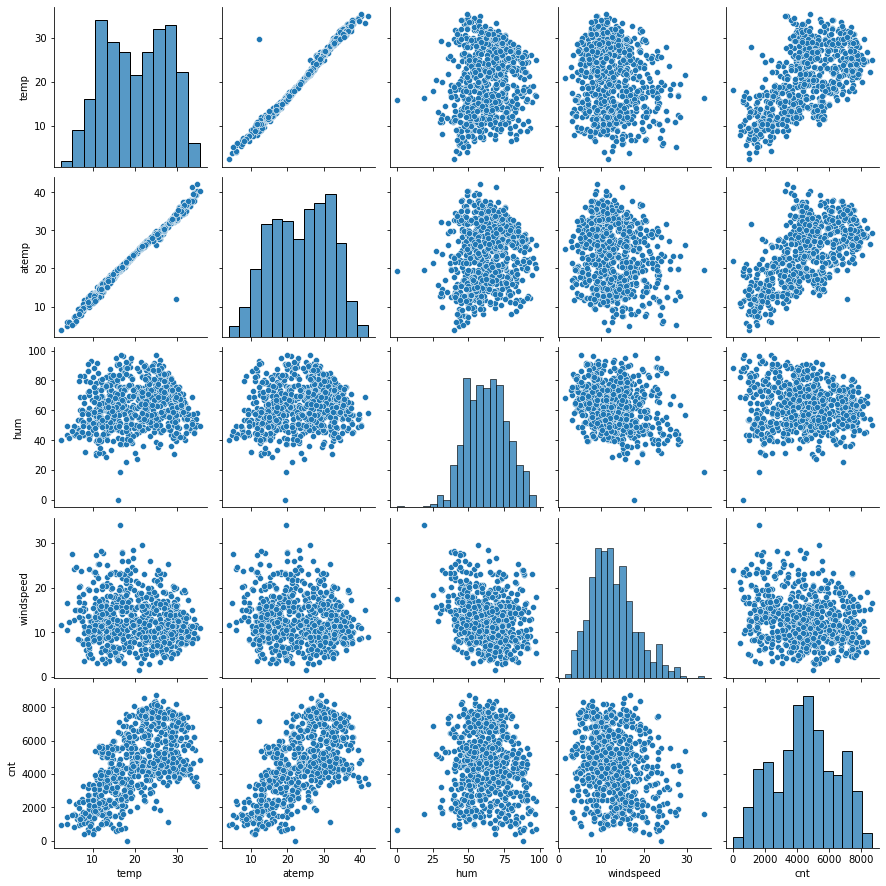

In [137]:
sns.pairplot(df[InvariableList])
plt.show();

From Pair plot it is evident that temp and atemp and cnt

Correlation Matrix

In [138]:
df_cor = df[['temp','atemp','hum','windspeed','cnt']].corr()


In [139]:
df_cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


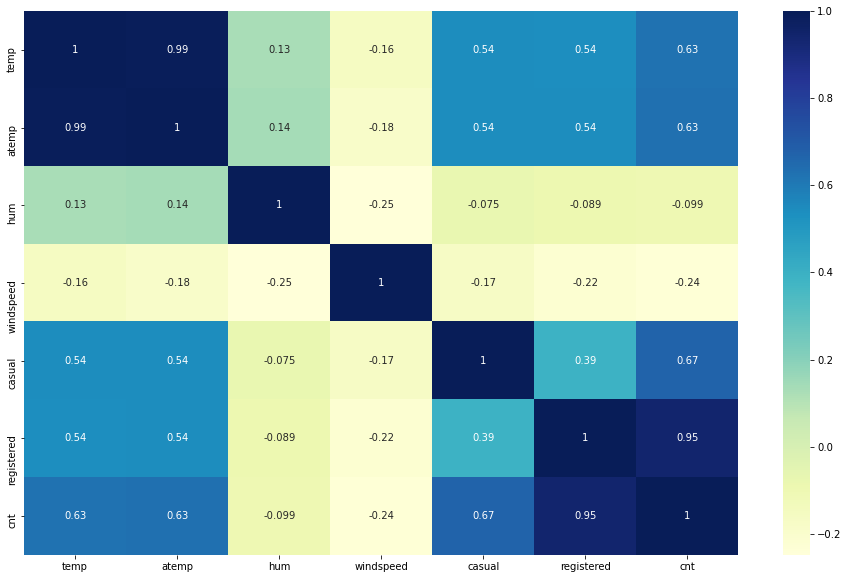

In [38]:
plt.figure(figsize = (16,10))
sns.heatmap(df_cor,annot=True,cmap='YlGnBu')
plt.show()

Even for correlation matrix the atemp and temp are related to each other with 0.99 correlation value

# Dummy Variables

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [141]:
Bike_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [142]:
df_dummies = pd.get_dummies(Bike_categorical, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_B,weathersit_C
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [143]:
df = df.drop(list(Bike_categorical.columns), axis=1)

In [144]:
df = pd.concat([df, df_dummies], axis=1)

In [145]:
df.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_B,weathersit_C
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_1', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

# Train test split

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
#splitting the data into test and train 
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 333)

In [149]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_B,weathersit_C
483,18.791653,22.50605,58.7083,7.832836,6304,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
650,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
212,31.638347,35.16460,55.0833,10.500039,4266,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
714,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0
8,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [150]:
df_train.shape

(510, 30)

In [151]:
df_test.shape

(219, 30)

# Rescaling

using Min Max scaling

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
scaler = MinMaxScaler()

In [154]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [155]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_B,weathersit_C
483,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
650,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
212,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
714,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0
8,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


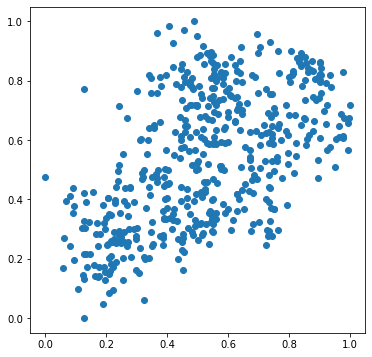

In [55]:
#Just checking the registere variable with temp if collinear
plt.figure(figsize=[6,6])
plt.scatter(df_train.registered, df_train.temp)
plt.show()

# Divinding train data into X and y

In [156]:
y_train = df_train.pop('cnt')
X_train = df_train

In [157]:
y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

In [158]:
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_B,weathersit_C
483,0.497426,0.487055,0.609956,0.194850,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
650,0.416433,0.409971,0.513852,0.255118,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
212,0.887856,0.819376,0.572294,0.276919,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
714,0.378013,0.381804,0.871429,0.161523,0,0,1,1,0,1,...,0,1,0,0,0,0,0,1,1,0
8,0.098690,0.048706,0.451083,0.700017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


# Building a linear model

In [159]:
# using RFE for selection. We will use LinearRegression function from SciKit Learn for its compatibility with RFE
# import RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [160]:
# Running RFE with the output number of variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [161]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('holiday_1', False, 8),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 2),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 11),
 ('workingday_1', False, 3),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [162]:
# columns selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_1', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [163]:
# columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_May', 'mnth_Oct', 'holiday_1', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_1'],
      dtype='object')

In [164]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# VIF Check

In [165]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [166]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,358.02
1,atemp,354.51
2,hum,22.80
3,windspeed,5.11
5,season_winter,2.75
4,season_spring,2.68
13,weathersit_B,2.27
6,yr_1,2.05
10,mnth_Nov,1.83
8,mnth_Jul,1.42


In [167]:
import statsmodels.api as sm

In [168]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [169]:
lr1.params

const               0.360901
temp                0.295940
atemp               0.166851
hum                -0.166450
windspeed          -0.180526
season_spring      -0.124268
season_winter       0.076629
yr_1                0.228716
mnth_Dec           -0.041307
mnth_Jul           -0.051320
mnth_Mar            0.045215
mnth_Nov           -0.058705
mnth_Sep            0.062326
weekday_Saturday    0.020677
weathersit_B       -0.048614
weathersit_C       -0.264216
dtype: float64

In [170]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.78e-183
Time:                        10:44:51   Log-Likelihood:                 501.75
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     494   BIC:                            -903.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3609      0.033  

# Model2

In [171]:
# Removing varaible atemp depending on high P value and high VIF
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

## VIF check

In [174]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,22.37
0,temp,15.94
2,windspeed,4.99
4,season_winter,2.72
3,season_spring,2.67
12,weathersit_B,2.26
5,yr_1,2.05
9,mnth_Nov,1.83
7,mnth_Jul,1.42
6,mnth_Dec,1.41


In [175]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [176]:
lr2.params

const               0.364321
temp                0.450107
hum                -0.164140
windspeed          -0.186426
season_spring      -0.124742
season_winter       0.077938
yr_1                0.228737
mnth_Dec           -0.041343
mnth_Jul           -0.051534
mnth_Mar            0.046173
mnth_Nov           -0.059310
mnth_Sep            0.061282
weekday_Saturday    0.019274
weathersit_B       -0.048974
weathersit_C       -0.265385
dtype: float64

In [177]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.9
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          2.68e-184
Time:                        10:53:10   Log-Likelihood:                 501.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     495   BIC:                            -908.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3643      0.033  

# Model3

In [178]:
# with high VIF decided to drop variable hum

In [179]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [180]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.21
1,windspeed,4.96
3,season_winter,2.35
4,yr_1,2.04
2,season_spring,1.89
8,mnth_Nov,1.80
11,weathersit_B,1.53
6,mnth_Jul,1.38
5,mnth_Dec,1.34
7,mnth_Mar,1.22


In [181]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [182]:
lr3.params

const               0.271706
temp                0.421391
windspeed          -0.152403
season_spring      -0.126296
season_winter       0.072348
yr_1                0.232890
mnth_Dec           -0.050575
mnth_Jul           -0.044304
mnth_Mar            0.051708
mnth_Nov           -0.059213
mnth_Sep            0.056324
weekday_Saturday    0.022151
weathersit_B       -0.076256
weathersit_C       -0.314265
dtype: float64

In [183]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.64e-181
Time:                        10:59:50   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     496   BIC:                            -896.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2717      0.026  

## Model 4

Removing the variable weekday_Saturday on the basis of its high Pvalue

In [186]:
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

In [187]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.12
1,windspeed,4.96
3,season_winter,2.35
4,yr_1,2.04
2,season_spring,1.89
8,mnth_Nov,1.80
10,weathersit_B,1.53
6,mnth_Jul,1.37
5,mnth_Dec,1.34
7,mnth_Mar,1.22


In [188]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [189]:
lr4.params

const            0.273485
temp             0.423220
windspeed       -0.152431
season_spring   -0.126920
season_winter    0.071866
yr_1             0.233303
mnth_Dec        -0.049622
mnth_Jul        -0.046387
mnth_Mar         0.053983
mnth_Nov        -0.058200
mnth_Sep         0.055948
weathersit_B    -0.075447
weathersit_C    -0.312035
dtype: float64

In [190]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          6.26e-182
Time:                        11:08:09   Log-Likelihood:                 489.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     497   BIC:                            -898.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2735      0.026     10.656

Now this model looks good with low multicollinearity though it is little high for temp but we could not drop it as it is important predictor for our target variable.
The P values for all the variables seems to be significant
R2 is 82.9 percent which good too
For now this is our final model

## ASSUMPTIONS

. Residual Analysis of Training Data

In [191]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

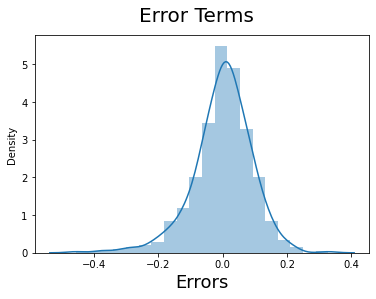

In [192]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are normal distribution

# Hypothesis Testing

Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

## Coefficients of 4th Model

const             0.2735      
temp              0.4232     
windspeed        -0.1524      
season_spring    -0.1269      
season_winter     0.0719      
yr_1              0.2333     
mnth_Dec         -0.0496      
mnth_Jul         -0.0464      
mnth_Mar          0.0540      
mnth_Nov         -0.0582      
mnth_Sep          0.0559     
weathersit_B     -0.0754    
weathersit_C     -0.3120  

From the coefficients we see are not zero therefore we reject null hypothesis

# F Statistic

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 201.1
Prob (F-statistic): 6.26e-182
The F-Statistics value of 201 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## Equation of Best fitted using 4th model

In [ ]:
cnt = 0.2735 + 0.4232temp -0.1524windspeed -0.1269season_spring + 0.0719season_winter + 0.2333yr_1 -0.0496mnth_Dec -0.0464mnth_Jul + 0.0540mnth_Mar -0.0582mnth_Nov +0.0559mnth_Sep -0.0754weathersit_B -0.3120weathersit_C  

## Making Prediction using Final Model

In [193]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [194]:
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_B,weathersit_C
22,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
468,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
553,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
504,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
353,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [196]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_B,weathersit_C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,0.251142,0.493151,0.054795,...,0.041096,0.146119,0.141553,0.136986,0.150685,0.123288,0.168950,0.689498,0.324201,0.036530
std,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,0.434663,0.501098,0.228100,...,0.198967,0.354034,0.349389,0.344621,0.358561,0.329520,0.375566,0.463759,0.469148,0.188034
min,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing X and Y 

In [197]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               219 non-null    float64
 1   atemp              219 non-null    float64
 2   hum                219 non-null    float64
 3   windspeed          219 non-null    float64
 4   season_spring      219 non-null    uint8  
 5   season_summer      219 non-null    uint8  
 6   season_winter      219 non-null    uint8  
 7   yr_1               219 non-null    uint8  
 8   mnth_Aug           219 non-null    uint8  
 9   mnth_Dec           219 non-null    uint8  
 10  mnth_Feb           219 non-null    uint8  
 11  mnth_Jan           219 non-null    uint8  
 12  mnth_Jul           219 non-null    uint8  
 13  mnth_Jun           219 non-null    uint8  
 14  mnth_Mar           219 non-null    uint8  
 15  mnth_May           219 non-null    uint8  
 16  mnth_Nov           219 no

In [198]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   temp           219 non-null    float64
 2   windspeed      219 non-null    float64
 3   season_spring  219 non-null    uint8  
 4   season_winter  219 non-null    uint8  
 5   yr_1           219 non-null    uint8  
 6   mnth_Dec       219 non-null    uint8  
 7   mnth_Jul       219 non-null    uint8  
 8   mnth_Mar       219 non-null    uint8  
 9   mnth_Nov       219 non-null    uint8  
 10  mnth_Sep       219 non-null    uint8  
 11  weathersit_B   219 non-null    uint8  
 12  weathersit_C   219 non-null    uint8  
dtypes: float64(3), uint8(10)
memory usage: 9.0 KB


In [199]:
# Making Predictions

In [200]:
y_pred = lr4.predict(X_test_lm4)

In [201]:
# Model Evaluation

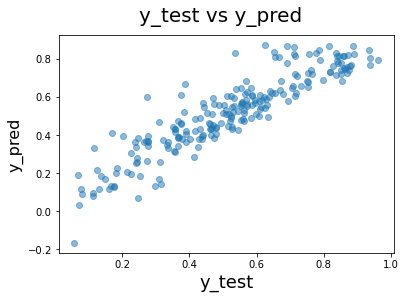

In [202]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [203]:
# R^2 value for Test

In [204]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8244386812307831

In [214]:
r2=0.8244386812307831

 # Adjusted R2


In [211]:
n = X_test.shape[0]

In [212]:
p = X_test.shape[1]

In [215]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8142118082927705

# Final Result Comparison

Train R^2 :0.829
Train Adjusted R^2 :0.825
Test R^2 :0.820
Test Adjusted R^2 :0.814
This seems to be a really good model that can very well 'Generalize' various datasets.

Top 3 predictors of the model 4 are

Temp :  A unit increase in temp increase the bike hire number by 0.432
yr_1(2019) : A unit increase in yr increase the bike hire number by 0.2333
weathersit_c : A unit increase in weathersit_c  decrease the bike hire number by 0.3120